In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

In [44]:
#MM/dd/yy hh:mm:ss

data_file='/home/pkotze/Downloads/Enigma_20220307_074044.CSV'

#custom date parser
#custom_date_parser = lambda x: datetime.strptime(x, "%y/%m/%d %H:%M:%S")

#df=pd.read_csv(data_file, skiprows=2, parse_dates=['Date Time'], )
df=pd.read_csv(data_file,  parse_dates=['Date Time'] ,header=[0],skiprows=[1,2])

df['Date Time'] = pd.to_datetime(df['Date Time'], format='%d%b%Y')


In [53]:
#help(pd.read_csv   )
print(df.columns)

Index(['Date Time', 'ALT', 'BARO', 'ASI', 'TAS', 'VSI', 'GlideS', 'RRPM ',
       'MBatt', 'BBatt', 'AMPS', 'AOA', 'OAT', 'ERPM', 'RFT1', 'RFT2', 'RCHT1',
       'RCHT2', 'FuelF', 'MAP', 'FuelL1', 'FuelL2', 'CalcFL', 'OilT', 'OilP',
       'CarbI', 'FuelP', 'H2OT', 'TC1', 'TC2', 'TC3', 'TC4', 'TC5', 'TC6',
       'TC7', 'TC8', 'TC9', 'TC10', 'TC11', 'TC12', 'RRCHT1', 'RRCHT2',
       'Raw OilT', 'Raw OilP', 'Ref CJC', 'Fail', 'ERPM.1', 'RFT1.1', 'RFT2.1',
       'RCHT1.1', 'RCHT2.1', 'FuelF.1', 'MAP.1', 'FuelL1.1', 'FuelL2.1',
       'CalcFL.1', 'OilT.1', 'OilP.1', 'CarbI.1', 'FuelP.1', 'H2OT.1', 'TC1.1',
       'TC2.1', 'TC3.1', 'TC4.1', 'TC5.1', 'TC6.1', 'TC7.1', 'TC8.1', 'TC9.1',
       'TC10.1', 'TC11.1', 'TC12.1', 'RRCHT1.1', 'RRCHT2.1', 'Raw OilT.1',
       'Raw OilP.1', 'Ref CJC.1', 'Fail.1', 'Bank', 'Pitch', 'Slip', 'MHead',
       'Yaw', 'G', 'TurnR', 'Lat', 'Long', 'Track', 'GSpd', 'GPSAlt', 'Status',
       'NSats', 'HAcc', 'VAcc', ' '],
      dtype='object')


4855    11.0
4856    11.0
4857    10.0
4858    10.0
4859    10.0
4860    10.0
4861    10.0
4862    11.0
4863    10.0
4864    10.0
4865    10.0
4866    10.0
4867    10.0
4868    10.0
4869    10.0
4870     9.0
4871     5.0
4872     6.0
4873     9.0
4874    10.0
Name: G, dtype: float64


NameError: name 'p' is not defined

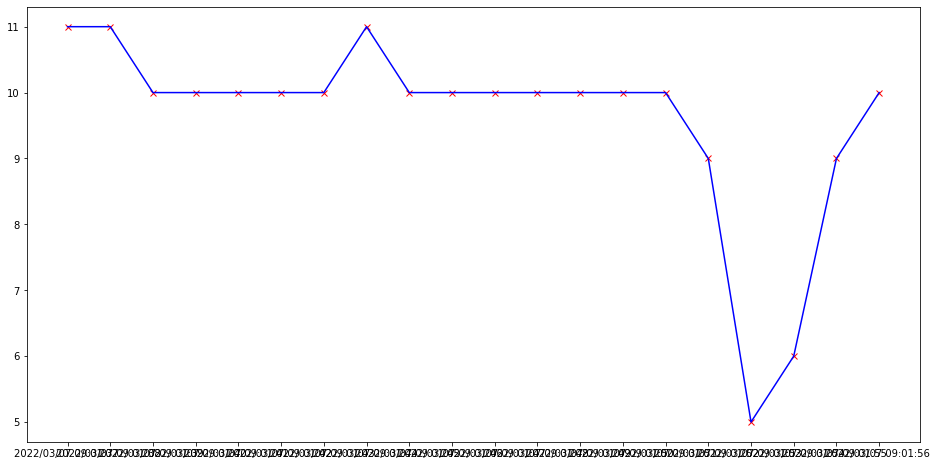

In [5]:
end=len(df.ALT)
offset=20
start=end-offset
plt.figure(figsize=[16,8])
x=df['Date Time'][start:end]
y=df.G[start:end].astype(float)
print(y)
plt.plot(x, y, 'rx')
plt.plot(x, y, 'b')
p

In [58]:
df.ALT

0        343
1        337
2        344
3        345
4        343
        ... 
4868    1361
4869    1367
4870    1351
4871    1354
4872    1354
Name: ALT, Length: 4873, dtype: int64

In [75]:
type(df['Date Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [76]:
import random
import matplotlib
import tkinter as Tk
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.dates as mdates


matplotlib.use('TkAgg')

root = Tk.Tk()
root.wm_title("Embedding in TK")
fig = plt.Figure()
canvas = FigureCanvasTkAgg(fig, root)
canvas.get_tk_widget().pack(side=Tk.TOP, fill=Tk.BOTH, expand=1)

ax=fig.add_subplot(111)
fig.subplots_adjust(bottom=0.25)

#y_values = [random.randrange(20, 40, 1) for _ in range(40)]
#x_values = [i for i in range(40)]
y_values=df['ASI']
x_values=df['Date Time']

ax.axis([x_values[0], x_values[9], y_values[0], max(y_values)])
ax.plot(x_values, y_values)

ax_time = fig.add_axes([0.212, 0.21, 0.78, 0.203])
s_time = Slider(ax_time, 'Time', x_values[0], x_values[60], valinit=x_values[0])

#Major
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%D')) 
#Minor
#ax.xaxis.set_minor_locator(mdates.MinuteLocator(interval=10))
#ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M')) 

def update(val):
    pos = s_time.val
    ax.axis([pos, pos+10, y_values[0], max(y_values)])
    fig.canvas.draw_idle()
s_time.on_changed(update)

Tk.mainloop()

TypeError: '<=' not supported between instances of 'float' and 'Timestamp'